<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum_mandiri04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path = "/content/gdrive/MyDrive/Praktikum_ML/Praktikum_04/"

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [ ]:
df = pd.read_csv(path + "/Data/calonpembelimobil.csv")
display(df.head())


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
#cek missing value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


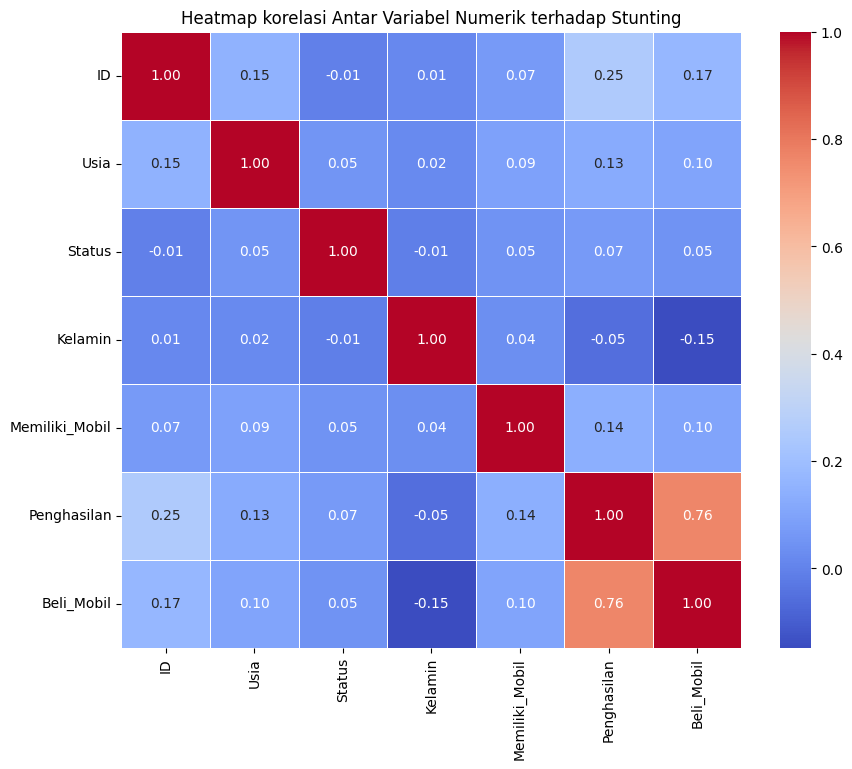

In [ ]:
# Visualisasi heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',  fmt=".2f", linewidths=0.5)
plt.title("Heatmap korelasi Antar Variabel Numerik terhadap Stunting", fontsize=12)
plt.show()

In [ ]:
# Fitur numerik dan biner

feature_num = ['Usia', 'Penghasilan']
feature_bin = ['Kelamin']
feature_cat = ['Status', 'Memiliki_Mobil']

features = feature_num + feature_bin + feature_cat

# Gabungkan & drop missing
use_cols = features + ['Beli_Mobil']
df_model = df[use_cols].dropna().copy()

x = df_model[features]
y = df_model['Beli_Mobil']

print("x.shape:", x.shape)
print("y.shape:", y.shape)

x.shape: (1000, 5)
y.shape: (1000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("data latih:", X_train.shape)
print("data uji:", X_test.shape)

data latih: (800, 5)
data uji: (200, 5)


In [ ]:

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin),
        ('cat', OneHotEncoder(handle_unknown='ignore'), feature_cat)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)

])

#Latihan model
clf.fit(X_train, y_train)
print("Model Logistic Regression berhasil di latih")

Model Logistic Regression berhasil di latih


In [ ]:
#Prediksi & probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1] # Select probabilities of the positive class

# Hitung metrik
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

Akurasi: 0.9100
Precision: 0.9739
Recall: 0.8819
F1 Score: 0.9256
ROC AUC Score: 0.9742


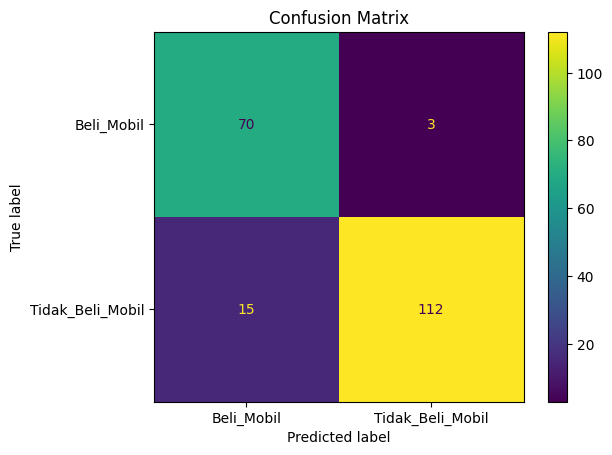

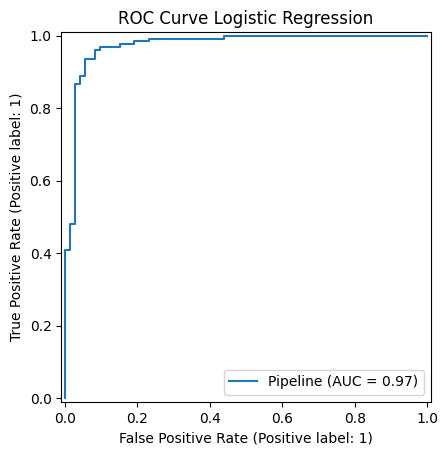

In [ ]:
#confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                       display_labels=['Beli_Mobil', 'Tidak_Beli_Mobil']
                       ).plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()

#ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test,)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak beli mobil (0)', 'beli mobil (1)']))

                      precision    recall  f1-score   support

Tidak beli mobil (0)       0.82      0.96      0.89        73
      beli mobil (1)       0.97      0.88      0.93       127

            accuracy                           0.91       200
           macro avg       0.90      0.92      0.91       200
        weighted avg       0.92      0.91      0.91       200



In [ ]:
from sklearn.model_selection import cross_val_score

#Lakukan cross validation (cv=5 berarti 5-fold)
scores = cross_val_score(clf, x, y, cv=5)

#Tampilkan hasil
print("Skor tiap fold:", scores)
print("rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.79  0.925 0.96  0.94  0.94 ]
rata-rata akurasi: 0.9109999999999999
Standar deviasi: 0.06151422599691877


In [ ]:
# ambil nama fitur & foefisien
feat_names =clf.named_steps['preprocess'].get_feature_names_out()
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Kofisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Kofisien (log-odds),Odds Ratio (e^coef)
1,num__Penghasilan,4.627325,102.240183
9,cat__Memiliki_Mobil_2,0.625303,1.868812
8,cat__Memiliki_Mobil_1,0.574267,1.775828
7,cat__Memiliki_Mobil_0,0.339773,1.404628
4,cat__Status_1,0.323219,1.381567
3,cat__Status_0,0.257039,1.293095
6,cat__Status_3,0.246813,1.279940
11,cat__Memiliki_Mobil_4,0.000708,1.000708
0,num__Usia,-0.039522,0.961249
5,cat__Status_2,-0.643454,0.525474
